In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
import matplotlib
from matplotlib import pyplot as plt

from sklearn.metrics import r2_score

# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario8_MC-9K_single_drug_model_approach

workdir = "path"

In [2]:
file_list = os.listdir(workdir)

In [3]:
drug_list = []
for x in range(len(file_list)):
    drug_file = file_list[x].split("_")[-1].split(".")[0]
    drug_list.append(drug_file)

17-AAG_//n
train_X shape: (301, 21213)
301 train samples
76 test samples
StartTime : 2019-12-12 18:45:09.012044
StartTime : 2019-12-12 18:45:09.012044
StartTime : 2019-12-12 18:45:09.013040
StartTime : 2019-12-12 18:45:09.013040
[18:45:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2019-12-12 18:45:33.133785
17-AAG’s final rmse value is = 1.474992
17-AAG R-squared value is = -0.032249
AEW541_//n
train_X shape: (302, 21213)
302 train samples
76 test samples
StartTime : 2019-12-12 18:45:33.308346
StartTime : 2019-12-12 18:45:33.308346
StartTime : 2019-12-12 18:45:33.308346
StartTime : 2019-12-12 18:45:33.308346
[18:45:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2019-12-12 18:45:57.991321
AEW541’s final rmse value is = 0.792848
AEW541 R-squared value

[18:50:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2019-12-12 18:51:17.867047
PHA-665752’s final rmse value is = 0.158822
PHA-665752 R-squared value is = -0.001780
PLX4720_//n
train_X shape: (297, 21213)
297 train samples
75 test samples
StartTime : 2019-12-12 18:51:18.045050
StartTime : 2019-12-12 18:51:18.045050
StartTime : 2019-12-12 18:51:18.045050
StartTime : 2019-12-12 18:51:18.045050
[18:51:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2019-12-12 18:51:39.538249
PLX4720’s final rmse value is = 0.698798
PLX4720 R-squared value is = 0.225169
RAF265_//n
train_X shape: (273, 21213)
273 train samples
69 test samples
StartTime : 2019-12-12 18:51:39.713813
StartTime : 2019-12-12 18:51:39.713813
StartTime : 2019-12-12 18:51:39.713813
StartTime : 2

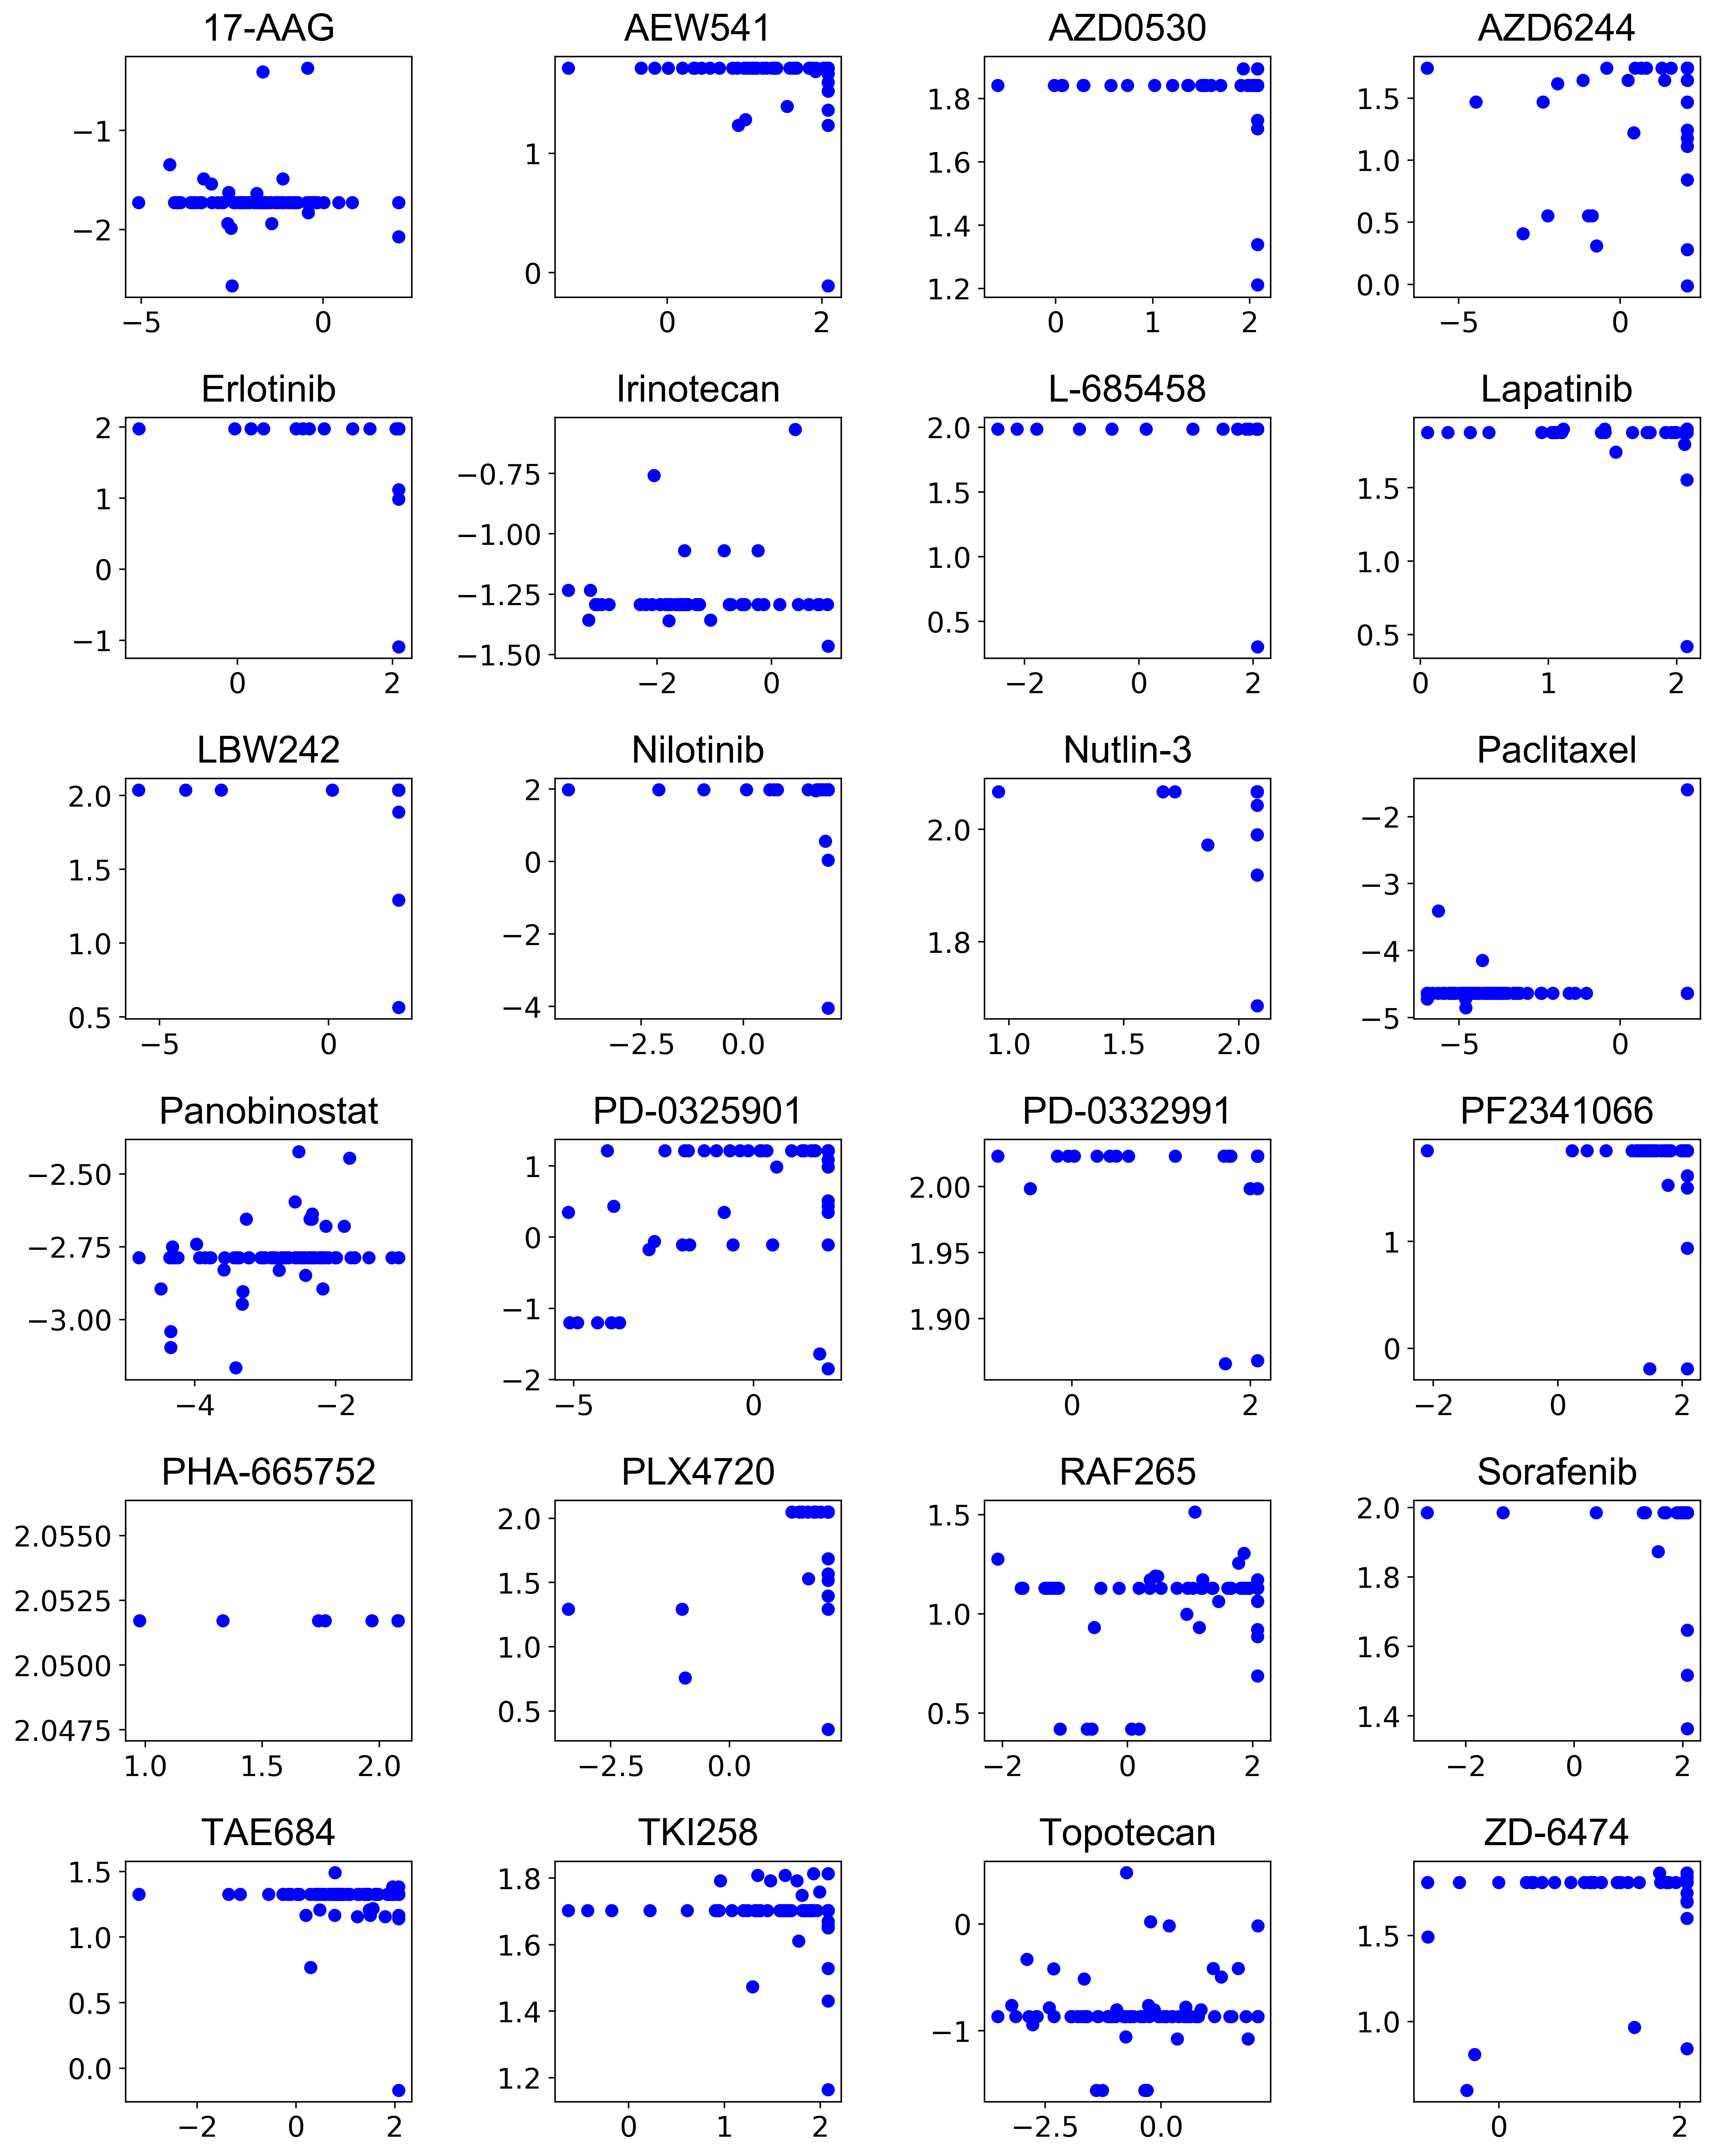

In [4]:
rmselist = []
r2list = []

# drug_list = ["Topotecan"]
fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for num in range(len(drug_list)):
    dname = drug_list[num]
    print('%s_//n' % dname)
    dataset = np.load(workdir + "//190509_ccle_mut_ic50_aron_%s.npz" % dname) # input file names. please make indified prefix of each file names
    x = dataset['x']
    y = dataset['y']
    train_X, test_X, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=42)
    
    train_X = train_X.astype('float32')
    test_X = test_X.astype('float32')
    print('train_X shape:', train_X.shape)
    print(train_X.shape[0], 'train samples')
    print(test_X.shape[0], 'test samples')
    
    # https://towardsdatascience.com/how-to-peXGBorm-XGB-and-XGB-regression-in-python-3b3b75541ad8
    # https://brunch.co.kr/@itschloe1/11
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)

    # https://towardsdatascience.com/how-to-peXGBorm-XGB-and-XGB-regression-in-python-3b3b75541ad8
    # https://brunch.co.kr/@itschloe1/11
    

    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    StartTime8 = datetime.now()
    print("StartTime :", StartTime8)
    import xgboost as xgb
    model = xgb.XGBRegressor()
    model.fit(train_X,train_y)
    EndTime8 = datetime.now()
    print("EndTime :", EndTime8)


    predicted_classes = model.predict(test_X)
    predicted_value = predicted_classes
    a = pd.DataFrame(predicted_value)
    b = pd.DataFrame(test_y)
    c = pd.concat([a,b], axis=1)
    c.columns=["Predicted","Test"]
    workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//MC-9K//individual_drugs//XGB//one_drug_one_model"
    c.to_csv(workdir + '//%s_result.csv' % dname)
    
    
    rse = ((b[0]-a[0])**2).sum()
    mse = rse / len(b)
    rmse = np.sqrt(mse)
    print("%s’s final rmse value is = %f" % (dname,rmse))
    r2_value = r2_score(b,a)
    print("%s R-squared value is = %f" % (dname,r2_value))
    rmselist.append(rmse)
    r2list.append(r2_value)
          
    plt.subplot(6,4,num+1)
    plt.scatter(test_y,predicted_value,c='blue')
    plt.title(dname,fontdict ={'fontsize' : 20},fontname="Arial",y = 1.02)
    plt.tick_params(labelsize=15)
    
#     plt.scatter(test_y,predicted_value,c='red')
#     plt.xlabel('test_IC50_value')
#     plt.ylabel('predicted_IC50_value')
#     plt.savefig(workdir + '//%s_test_scatterplot.png' % dname)
    
    workdir = "D://ResIC50_finalized_data//Dataset//Small_dataset_CCLE//ccle_each_24_drugs//mut"
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//MC-9K//individual_drugs//XGB"   

plt.savefig(workdir +'//191212_MC9K_one_drug_one_model_XGB.png', dpi=400)
workdir = "D://ResIC50_finalized_data//Dataset//Small_dataset_CCLE//ccle_each_24_drugs//mut"

In [5]:
print("This is lasso regression with expression dataset for each drugs")
a = pd.DataFrame(drug_list)
b = pd.DataFrame(rmselist)
c =pd.DataFrame(r2list)
result = pd.concat([a,b,c],axis=1)
result.columns = ['Drug','RMSE','R2value']

This is lasso regression with expression dataset for each drugs


In [6]:
result

,Drug,RMSE,R2value
0,17-AAG,1.474992,-0.032249
1,AEW541,0.792848,-0.169200
2,AZD0530,0.625005,-0.050674
3,AZD6244,1.557034,0.088499
4,Erlotinib,0.709853,-0.502539
5,Irinotecan,1.203831,0.002808
6,L-685458,1.013198,-0.097355
7,Lapatinib,0.523967,-0.172718
8,LBW242,1.316326,-0.057902
9,Nilotinib,1.375383,-0.689710


In [7]:
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//MC-9K//individual_drugs//XGB" 
result.to_csv(workdir +'//191212_MC9K_one_drug_one_model_XGB_24drugs_metrics.csv')